In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [2]:
df = pd.read_csv (r"C:\Users\fangyi\bootcamp_fangyi_jiang\project\data\Processed\data_features.csv")

In [3]:
## Feature Engineering
df['return'] = (df['close'] - df['close'].shift(1))/df['close'].shift(1)
df['lag_1'] = df['return'].shift(1)
df['roll_mean_5'] = df['return'].rolling(5).mean().shift(1)
df['momentum'] = df['return'] - df['return'].shift(7)
df['y_next_ret'] = df['return'].shift(-1)
df['y_up'] = (df['y_next_ret']>0).astype(int)
df_feat = df.dropna().copy()

In [4]:
## Split
cut=int(len(df_feat)*0.8)
train, test = df_feat.iloc[:cut], df_feat.iloc[cut:]
features=['lag_1','roll_mean_5','momentum'] 
X_tr, X_te = train[features], test[features]
y_tr_reg, y_te_reg = train['y_next_ret'], test['y_next_ret']
y_tr_clf, y_te_clf = train['y_up'], test['y_up']

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.33      0.71      0.45         7

    accuracy                           0.37        19
   macro avg       0.42      0.44      0.35        19
weighted avg       0.44      0.37      0.33        19



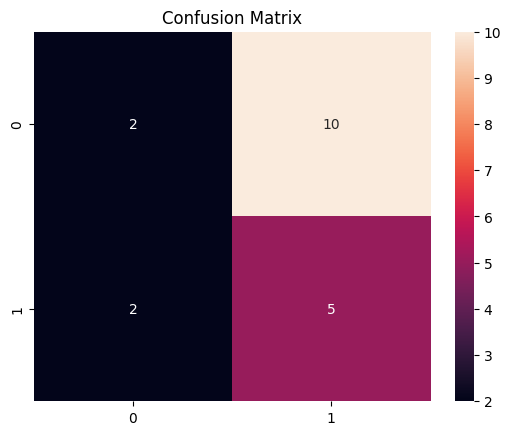

In [5]:
## Classification
clf = Pipeline([('scaler', StandardScaler()), ('logit', LogisticRegression(max_iter=1000))])
clf.fit(X_tr, y_tr_clf)
predc = clf.predict(X_te)
print(classification_report(y_te_clf, predc))
cm = confusion_matrix(y_te_clf, predc)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); plt.show()

## Interpretation (Markdown)
- What worked: I am doing a regresion analysis based on stock price and time information, it is not going to work well. There is only a 37% accuracy in predicting whether the stock price will go up or down.
- Where might assumptions fail: The base assumption that autocorrelation can explain most of stock price movement
- How would you extend features or model: I would at least include features like market return and industry specific return.